In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [16]:
df=pd.read_csv('/content/Covid.csv')
df.info()
df.columns
df=df.drop('ID',axis =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                14 non-null     int64 
 1   Fever             14 non-null     object
 2   Cough             14 non-null     object
 3   Breathing issues  14 non-null     object
 4   Infected          14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


In [17]:
dic = {'YES':1, 'NO':0}
for col in df.columns:
  df[col] = df[col].map(dic)

In [18]:
df.head()
X = df.iloc[:,:3]
X.head()

,Fever,Cough,Breathing issues
0,0,0,0
1,1,1,1
2,1,1,0
3,1,0,1
4,1,1,1


In [19]:
y = df['Infected']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Infected, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42, stratify = y)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (11, 3)
Testing split input-  (3, 3)


In [21]:
dtree=DecisionTreeClassifier(criterion = "entropy")
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [23]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[1 0]
 [1 1]]


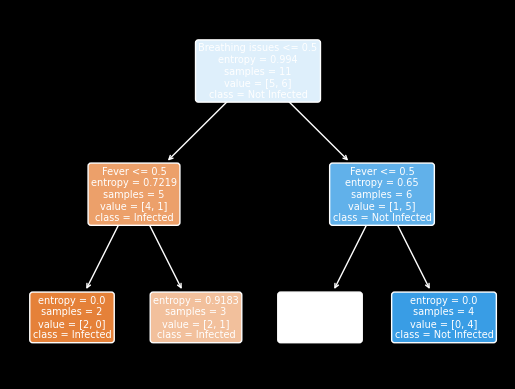

In [24]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, class_names =["Infected", "Not Infected"] , filled = True , precision = 4, rounded = True)